# Data preparation

## Library import

In [1]:
import random
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

### Data import and overview

In [2]:
oneypd = pd.read_csv("data.csv",sep=",")

In [3]:
oneypd.head()

,id,vintage_year,monthly_installment,loan_balance,bureau_score,num_bankrupt_iva,time_since_bankrupt,num_ccj,time_since_ccj,ccj_amount,...,months_since_2mia,avg_mia_6m,max_arrears_bal_6m,max_mia_6m,avg_bal_6m,avg_bureau_score_6m,cc_util,annual_income,emp_length,months_since_recent_cc_delinq
0,6670001,2005,746.70,131304.44,541.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,-42.0,0.0,132080.0,542.0,0.4578,76749,3,11
1,9131199,2006,887.40,115486.51,441.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,116972.0,494.0,0.6299,78451,10,7
2,4963167,2004,1008.50,128381.73,282.0,0.0,0.0,1.0,36.0,459.0,...,0.0,0.0,1198.0,2.0,128500.0,290.0,0.6331,31038,3,6
3,3918582,2005,458.23,35482.96,461.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,-114.0,0.0,36610.0,460.0,0.4990,56663,8,6
4,5949777,2006,431.20,77086.31,466.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,77518.0,468.0,0.9568,77014,10,3


In [4]:
oneypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25906 entries, 0 to 25905
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             25906 non-null  int64  
 1   vintage_year                   25906 non-null  int64  
 2   monthly_installment            25906 non-null  float64
 3   loan_balance                   25906 non-null  float64
 4   bureau_score                   25473 non-null  float64
 5   num_bankrupt_iva               25473 non-null  float64
 6   time_since_bankrupt            25473 non-null  float64
 7   num_ccj                        25473 non-null  float64
 8   time_since_ccj                 25473 non-null  float64
 9   ccj_amount                     25473 non-null  float64
 10  num_bankrupt                   25473 non-null  float64
 11  num_iva                        25473 non-null  float64
 12  min_months_since_bankrupt      25473 non-null 

### Round arrears count fields

In [5]:
oneypd["max_arrears_12m"] = np.round(oneypd['max_arrears_12m'],4)
oneypd['arrears_months'] = np.round(oneypd['arrears_months'],4)

## Default flag

In [6]:
# default = 1 and non-default =0
oneypd['default_event'] = np.logical_or((np.logical_or(
    oneypd['arrears_event'] == 1, oneypd['term_expiry_event'] == 1)), oneypd['bankrupt_event'] == 1).astype(int)

## Selecting variables and droping missing value

In [7]:
var_list =['default_event','bureau_score', 'time_since_bankrupt', 'num_ccj',
       'time_since_ccj', 'ccj_amount','ltv','mob','max_arrears_12m','max_arrears_bal_6m','avg_bal_6m', 'loan_balance',
           'cc_util', 'annual_income', 'emp_length','months_since_recent_cc_delinq','loan_term']

In [8]:
df=oneypd[var_list].dropna()

## Database split in test and train sample

In [9]:
# separating dependent andd independent variables
X = df.drop('default_event',axis=1)
y = df['default_event']

In [10]:
# Setting seed for split
seed = 123

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed,stratify = y)

# Random Forest Analysis

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf = RandomForestClassifier(n_estimators=100,max_features=4,random_state=seed)

In [14]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=4, random_state=123)

In [15]:
importance = pd.DataFrame(clf.feature_importances_,index=X_train.columns,columns=[' Gini importance'])
importance.sort_values(by=" Gini importance",ascending=False)

,Gini importance
cc_util,0.210280
annual_income,0.109878
max_arrears_12m,0.101463
max_arrears_bal_6m,0.083659
loan_term,0.073515
bureau_score,0.070272
ltv,0.062859
mob,0.056415
avg_bal_6m,0.055917
loan_balance,0.053716


# Boosting Analysis

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
reg = GradientBoostingRegressor(n_estimators=100,max_depth=4,random_state=seed)

In [18]:
reg.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=123)

In [19]:
importance_reg = pd.DataFrame(reg.feature_importances_,index=X_train.columns,columns=[' Gini importance'])
importance_reg.sort_values(by=" Gini importance",ascending=False)

,Gini importance
cc_util,0.367809
max_arrears_12m,0.226487
annual_income,0.128804
loan_term,0.108224
mob,0.041719
bureau_score,0.031555
max_arrears_bal_6m,0.029916
ltv,0.021042
loan_balance,0.009348
time_since_ccj,0.007278


# Test sample Analysis

In [20]:
y_pred = reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test,y_pred)

0.029275725493248615

# Boosting with shrinkage

In [22]:
reg_shrink = GradientBoostingRegressor(n_estimators=100,max_depth=4,learning_rate=0.05,random_state=seed)

In [23]:
reg_shrink.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, random_state=123)

In [24]:
y_pred_shrink = reg_shrink.predict(X_test)

In [25]:
MSE(y_test,y_pred_shrink)

0.029260565279671594

# ML model Calibration

In [27]:
# Random forest regressor prediction on X 
rf_pred = reg.predict(X)

In [28]:
rf_pred = pd.DataFrame(rf_pred,index=y.index,columns=['Prediction'])

In [29]:
import statsmodels.api as sm
pd_model = sm.GLM(y, sm.add_constant(pd.DataFrame(rf_pred)),
                  family=sm.families.Binomial()).fit()

In [30]:
pd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          default_event   No. Observations:                25469
Model:                            GLM   Df Residuals:                    25467
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2496.9
Date:                Mon, 13 Jul 2020   Deviance:                       4993.8
Time:                        19:54:44   Pearson chi2:                 1.70e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4893      0.057    -79.049      0.000      -4.601      -4.378
Prediction    10.3712      0.202     51.450      0.000       9.976      10.766
==============================================================================
"""

# ML Discriminatory Power Assessment

In [31]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
import matplotlib.pyplot as plt

## ROC

In [32]:
fper, tper, thresholds=roc(y_test,y_pred)

In [33]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

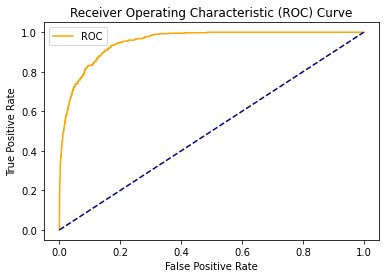

In [34]:
plot_roc_cur(fper,tper)

## Gini

In [35]:
AUC=auc(fper,tper)
AUC

0.9525593819319106

In [36]:
gini = 2*AUC -1
gini

0.9051187638638212